In [1]:
import pandas as pd 
import numpy as np
import math , sys
import matplotlib.pyplot as plt 


from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score,mean_squared_error ,r2_score
plt.rc('font',size=18)
plt.rcParams['figure.constrained_layout.use'] = True 
plt.rcParams.update({'font.size':22})
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.7
import datetime
#%matplotlib inline


In [2]:
pearseID = 32
portobelloID =43

df =pd.read_csv("dublinbikes_20200101_20200401.csv")
df.head()


,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,2,2020-01-01 06:25:02,2020-01-01 06:24:06,BLESSINGTON STREET,20,18,2,Open,Blessington Street,53.35677,-6.26814
1,2,2020-01-01 06:30:02,2020-01-01 06:24:06,BLESSINGTON STREET,20,18,2,Open,Blessington Street,53.35677,-6.26814
2,2,2020-01-01 06:35:02,2020-01-01 06:34:15,BLESSINGTON STREET,20,18,2,Open,Blessington Street,53.35677,-6.26814
3,2,2020-01-01 06:40:03,2020-01-01 06:37:22,BLESSINGTON STREET,20,20,0,Open,Blessington Street,53.35677,-6.26814
4,2,2020-01-01 06:45:02,2020-01-01 06:37:22,BLESSINGTON STREET,20,20,0,Open,Blessington Street,53.35677,-6.26814


Seperate out the data based on the two selected station pearse street and portobello road write both to a csv file to be used 

In [3]:

pearseRaw = df[df.iloc[:,0]==pearseID]
pearseRaw.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
4700,32,2020-01-01 06:25:02,2020-01-01 06:22:19,PEARSE STREET,30,6,24,Open,Pearse Street,53.344303,-6.250427
4701,32,2020-01-01 06:30:02,2020-01-01 06:22:19,PEARSE STREET,30,6,24,Open,Pearse Street,53.344303,-6.250427
4702,32,2020-01-01 06:35:02,2020-01-01 06:32:28,PEARSE STREET,30,6,24,Open,Pearse Street,53.344303,-6.250427
4703,32,2020-01-01 06:40:03,2020-01-01 06:32:28,PEARSE STREET,30,6,24,Open,Pearse Street,53.344303,-6.250427
4704,32,2020-01-01 06:45:02,2020-01-01 06:42:37,PEARSE STREET,30,6,24,Open,Pearse Street,53.344303,-6.250427


In [4]:
portobelloRaw =df[df.iloc[:,0]==portobelloID] 
portobelloRaw.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
6376,43,2020-01-01 06:25:02,2020-01-01 06:24:14,PORTOBELLO ROAD,30,11,19,Open,Portobello Road,53.33009,-6.268044
6377,43,2020-01-01 06:30:02,2020-01-01 06:29:47,PORTOBELLO ROAD,30,12,18,Open,Portobello Road,53.33009,-6.268044
6378,43,2020-01-01 06:35:02,2020-01-01 06:31:29,PORTOBELLO ROAD,30,13,17,Open,Portobello Road,53.33009,-6.268044
6379,43,2020-01-01 06:40:03,2020-01-01 06:37:44,PORTOBELLO ROAD,30,14,16,Open,Portobello Road,53.33009,-6.268044
6380,43,2020-01-01 06:45:02,2020-01-01 06:37:44,PORTOBELLO ROAD,30,14,16,Open,Portobello Road,53.33009,-6.268044


In [5]:
portobelloRaw.to_csv("portobelloRaw.csv",index=False)
pearseRaw.to_csv("pearseRaw.csv",index=False)

Now written the raw portobello and pearse data to a file 

The only information we need to work with is the Time and available bikes 
Reassign dataframe so indexing is from 1 

In [6]:
pearse=pd.read_csv("portobelloRaw.csv",usecols=[1,6],parse_dates=[1])
portobello = pd.read_csv("pearseRaw.csv",usecols=[1,6],parse_dates=[1])

## convert the data to the correct type
pearse.iloc[:,0] = pd.to_datetime(pearse.iloc[:,0])
pearse.iloc[:,1] = pearse.iloc[:,1].astype(str).astype(int)

portobello.iloc[:,0] = pd.to_datetime(portobello.iloc[:,0])
portobello.iloc[:,1] = portobello.iloc[:,1].astype(str).astype(int)


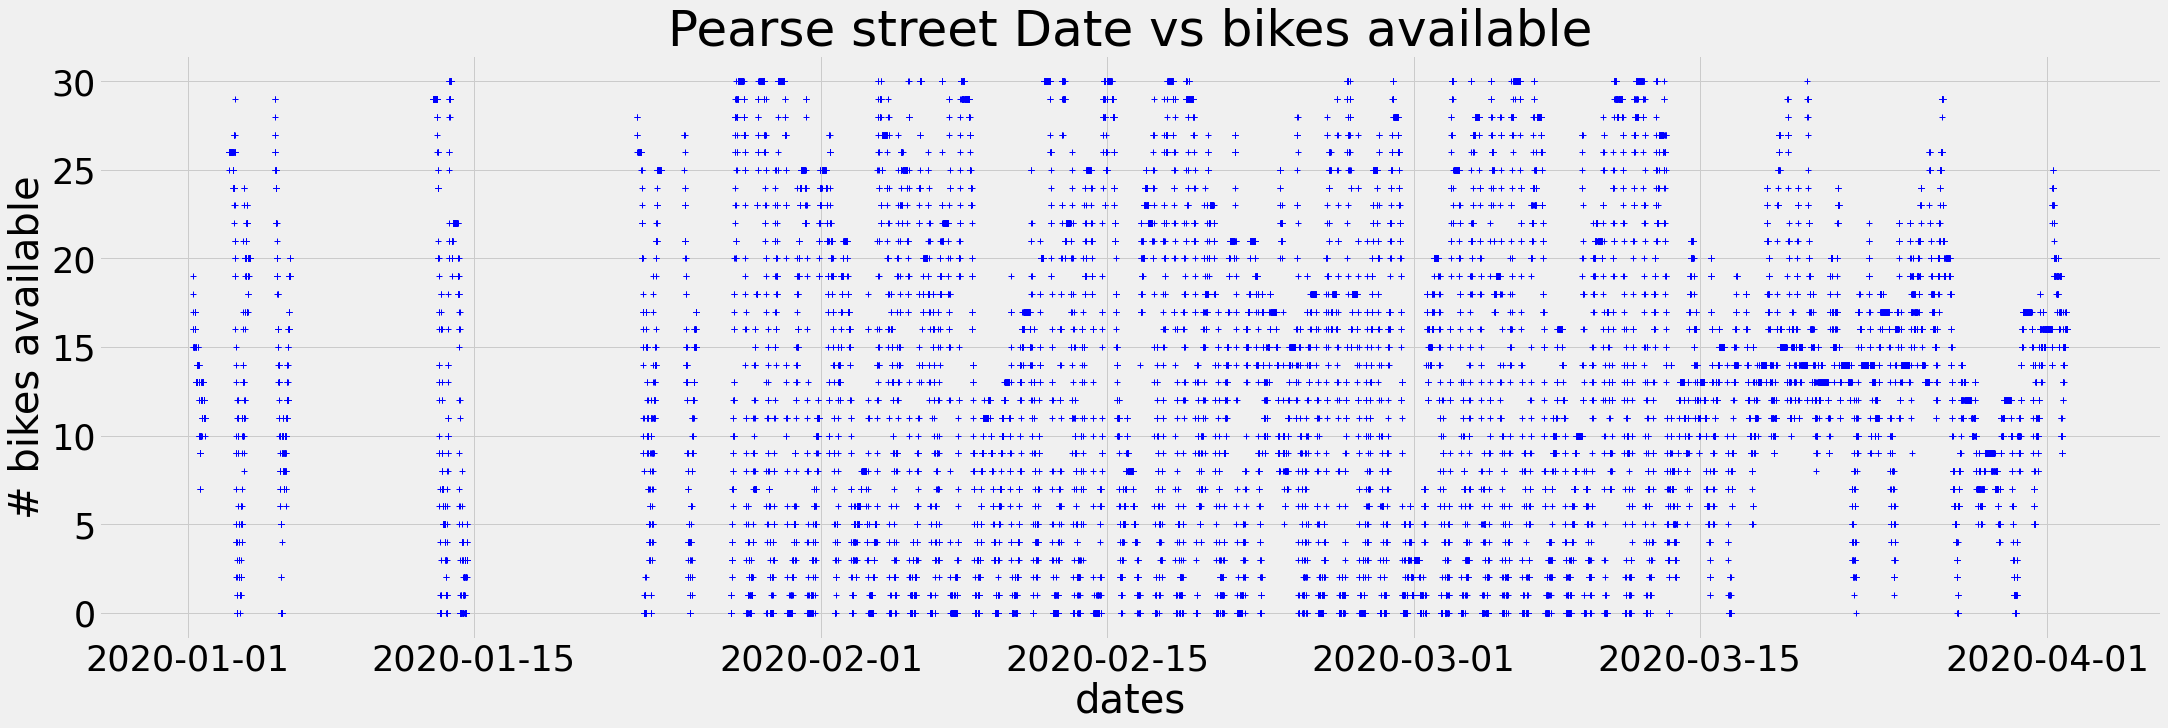

In [8]:
plt.plot(pearse.iloc[:,0],pearse.iloc[:,1],'+',color='blue')

plt.rcParams['figure.figsize']=[30,10]
plt.title("Pearse street Date vs bikes available",size=50)
plt.xlabel('dates',size=40)
plt.ylabel('# bikes available',size=40)
plt.rc('xtick',labelsize=35)
plt.rc('ytick',labelsize=35)


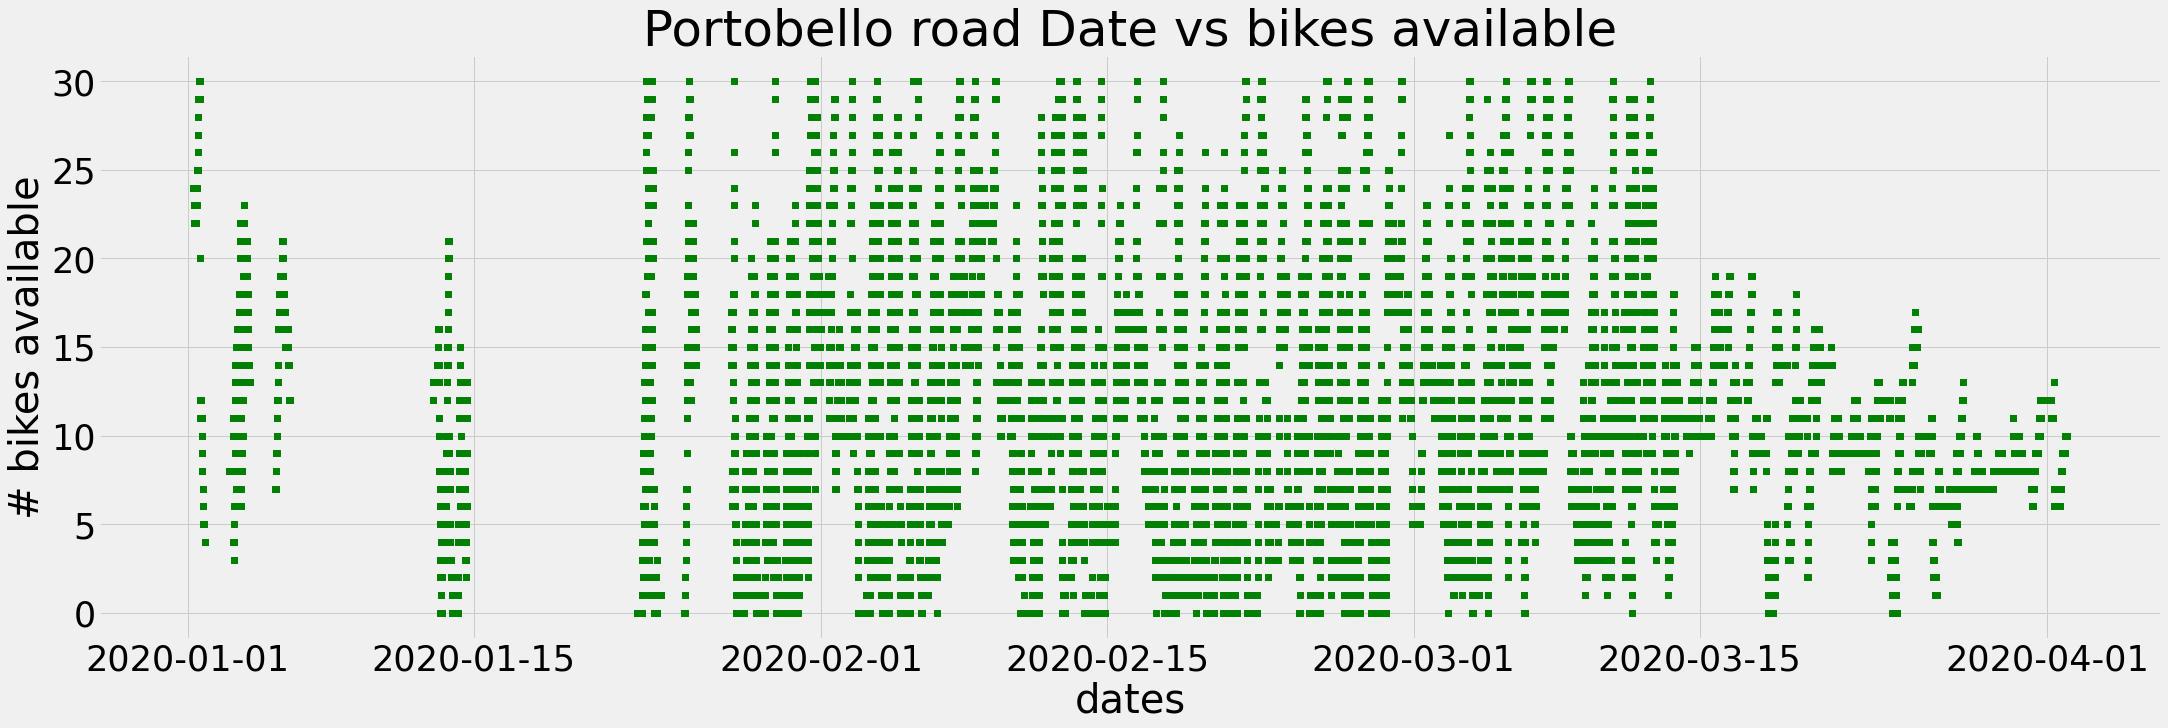

In [9]:
plt.plot(portobello.iloc[:,0],portobello.iloc[:,1],'s',color='green')

plt.rcParams['figure.figsize']=[30,10]
plt.title("Portobello road Date vs bikes available",size=50)
plt.xlabel('dates',size=40)
plt.ylabel('# bikes available',size=40)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)


evident in january there is some discrepancy -- up until 26th -- 

also effect of covid is evident 

In [11]:
def removeData(df):
   start = pd.to_datetime("28-01-2020",format='%d-%m-%Y')
   end = pd.to_datetime("11-03-2020", format='%d-%m-%Y')
   temp =df[df.iloc[:,0]>=start]
   df = temp[temp.iloc[:,0]<=end]
   
   return df


Note initially time data starts at 06:25 not at midnight
Both datasets are of the same size
Both stations have a max capaxity of 30 -bike stands 


In [12]:
pearseRed = removeData(pearse)
portobelloRed = removeData(portobello)
portobelloRed.head()

,TIME,AVAILABLE BIKES
1813,2020-01-28 00:00:02,0
1814,2020-01-28 00:05:02,0
1815,2020-01-28 00:10:02,0
1816,2020-01-28 00:15:02,0
1817,2020-01-28 00:20:02,0


Plot the new reduced features 

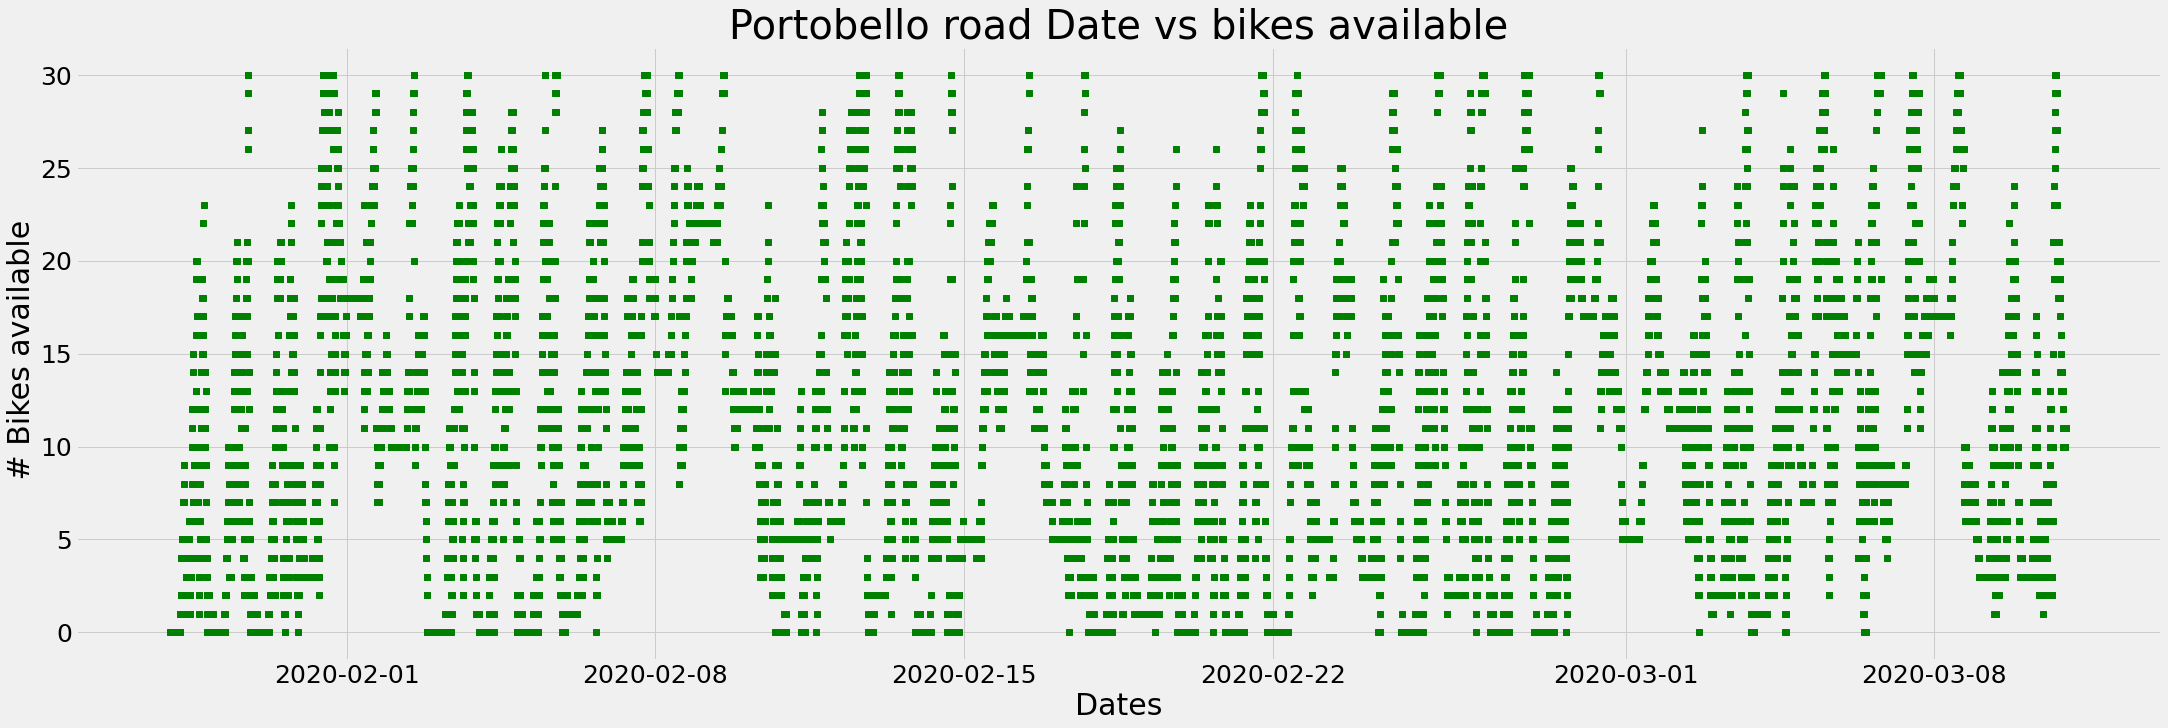

In [13]:
plt.plot(portobelloRed.iloc[:,0],portobelloRed.iloc[:,1],'s',color='green')

plt.rcParams['figure.figsize']=[30,10]
plt.title("Portobello road Date vs bikes available",size=40)
plt.xlabel('Dates',size=30)
plt.ylabel(' # Bikes available',size='30')
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)


C:\Users\brosn\AppData\Local\Temp/ipykernel_10424/1578911621.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  tFull = pd.array(pd.DatetimeIndex(portobelloRed.iloc[:,0]).astype(np.int64))/convertSec


300.0
<PandasArray>
[                 0.0, 0.003472222222222222, 0.006944444444444444,
 0.010416666666666666, 0.013888888888888888, 0.017361111111111112,
 0.020833333333333332, 0.024305555555555556, 0.027777777777777776,
              0.03125,
 ...
    42.96527777777778,             42.96875,    42.97222222222222,
    42.97569444444445,   42.979166666666664,   42.982638888888886,
   42.986111111111114,   42.989583333333336,    42.99305555555555,
    42.99652777777778]
Length: 12384, dtype: float64


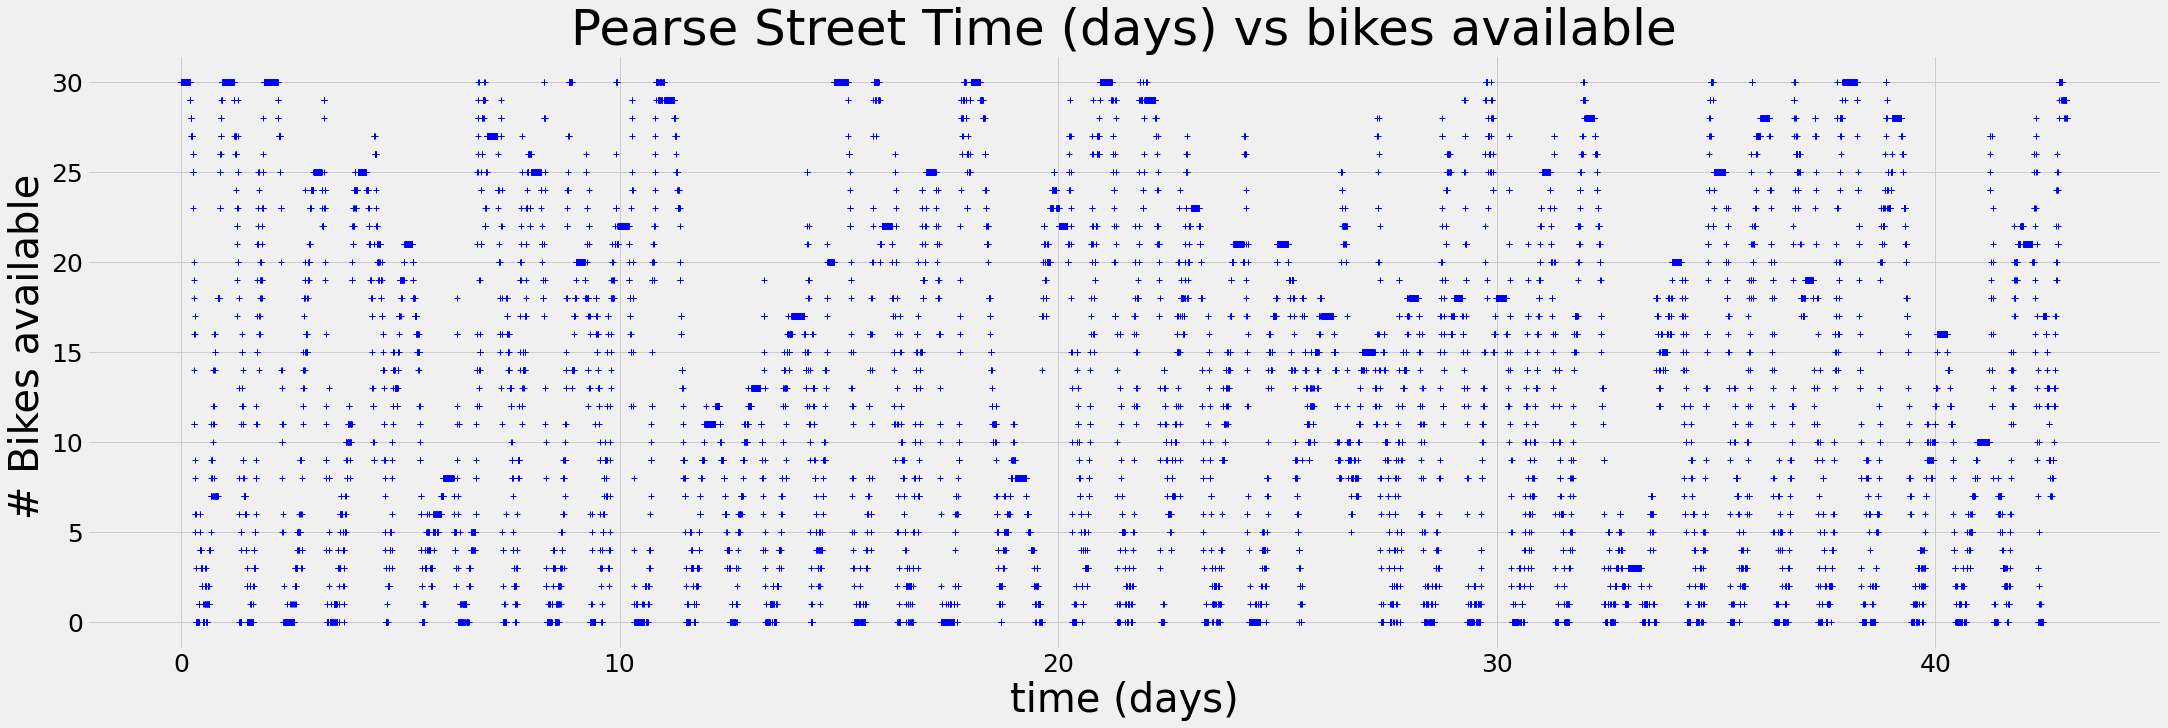

In [14]:
portobelloRed.head()

convertSec = 1000000000
tFull = pd.array(pd.DatetimeIndex(portobelloRed.iloc[:,0]).astype(np.int64))/convertSec
dt = tFull[1] -tFull[0]
print(dt)

t = (tFull-tFull[0]) /60 /60/24

print(t)

plt.plot(t,pearseRed.iloc[:,1],'+',color='blue')
plt.rcParams['figure.figsize']=[30,10]
plt.title("Pearse Street Time (days) vs bikes available",size=50)
plt.xlabel('time (days)',size=40)
plt.ylabel(' # Bikes available',size=40)
plt.rc('xtick',labelsize=45)
plt.rc('ytick',labelsize=40)


In [15]:
def test_predictions1(q,dd,lag,plot,y,t):


    ## a q step ahead prediction -- we need to look at 
    stride = 1 
    cv =TimeSeriesSplit(n_splits=5)
    XX = y[0:y.size-q-lag*dd:stride]

    for i in range(1,lag):
        X = y[i*dd:y.size-q-(lag-i)*dd:stride]
        XX = np.column_stack((XX,X))
    
    yy = y[lag*dd+q::stride]
    tt=t[lag*dd+q::stride]
   
    #for trainIndex,testIndex in kf.split()
   # train,test = train_test_split(np.arange(0,yy.size),test_size=0.2,shuffle=False)
    temp=[]; meanError =[]; stdErr =[]
    for train,test in cv.split(np.arange(0,yy.size)):
        xTrain,xTest = XX[train],XX[test]
        yTrain,yTest = yy[train],yy[test]
        model = Ridge(fit_intercept=False).fit(xTrain,yTrain)
        yPred = model.predict(xTest)
        temp.append(mean_squared_error(yTest,yPred))

    meanError.append(np.array(temp).mean())
    stdErr.append(np.array(temp).std())

    print(meanError)
    print(stdErr)
    print(model.intercept_,model.coef_)


    if plot:
        yPred = model.predict(XX)
        plt.scatter(t,y,color='black')
        plt.scatter(tt,yPred,color='blue')
      #  plt.title(titleN,size=20)
        plt.rcParams['figure.figsize']=[8,8]
        plt.xlabel('Time (days)',size=15)
        plt.ylabel("# Bikes ",size=15)
        plt.legend(["Training data","Predictions"],loc='upper right')
        day = math .floor(24*60*60/dt) ## number of samples per day
        plt.xlim(((lag*dd+q)/day,(lag*dd+q)/day+14))
        plt.show

In [16]:
plot = True 
#test_predictions1(q=2,dd=1,lag=3,plot=plot,y=portobelloRed.iloc[:,1],t=t)

In [17]:
def applyFeatures(df):
    df['dayNum'] = df.iloc[:,0].dt.dayofweek
    df['dataType'] = np.where(df['dayNum']<=4, 'wday', (np.where(df['dayNum']==5,'Saturday','Sunday')))
    
    return df

In [18]:
def seperateData(df):
    weekDay = df[df.iloc[:,3]=='wday']
    
    weekEnd = df[df.iloc[:,3] != 'wday']

    return(weekDay,weekEnd)


try apply features and then seperate the data

In [19]:

pearseWithDays = applyFeatures(pearseRed)
pearseWithDays.head()
portobelloWithDays = applyFeatures(portobelloRed)
pearse1,pearse2 = seperateData(pearseWithDays)
pearse1.head()
portobello1,portobello2 = seperateData(portobelloWithDays)
pearseWithDays.head()


,TIME,AVAILABLE BIKES,dayNum,dataType
1813,2020-01-28 00:00:02,30,1,wday
1814,2020-01-28 00:05:02,30,1,wday
1815,2020-01-28 00:10:02,30,1,wday
1816,2020-01-28 00:15:02,30,1,wday
1817,2020-01-28 00:20:02,30,1,wday


In [20]:
def addDays(df):

    convertSec = 1000000000
    tFull = pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/convertSec
    dt = tFull[1] -tFull[0]
    t = (tFull-tFull[0]) / 60 /60 / 24 
    df['Day'] = t.tolist()
    return df

In [21]:
def convertDays(df):
    convertSec = 1000000000
    # tFull = pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/convertSec
    tFull = ((pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/convertSec).values
    dt = tFull[1] -tFull[0]
    print(dt)

    t = (tFull-tFull[0]) /60 /60/24
    #df.iloc[:,4]=t.tolist()
    return t ,dt  

In [22]:
secondsPearse,dt = convertDays(pearseRed)


300.0


C:\Users\brosn\AppData\Local\Temp/ipykernel_10424/231375872.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  tFull = ((pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/convertSec).values


have four datasets now 
pearse weekends and weekdays seperated 

In [23]:
pearse1.to_csv("pearseWeekdays.csv",index=False)
pearse2.to_csv("pearseWeekEnds.csv",index=False)
pearseWithDays.to_csv("pearseProcessed.csv",index = False)
portobello1.to_csv("portobelloWeekdays.csv",index=False)
portobello2.to_csv("portobelloWeekEnd.csv",index=False)
portobelloWithDays.to_csv("portobelloProcessed.csv",index=False)

pearse1.iloc[:,1]


1813     30
1814     30
1815     30
1816     30
1817     30
         ..
14192    29
14193    28
14194    28
14195    28
14196    28
Name: AVAILABLE BIKES, Length: 8928, dtype: int32

In [24]:
portobelloWeekDay =pd.read_csv("portobelloWeekdays.csv")
portobelloWeekEnd =pd.read_csv("portobelloWeekEnd.csv")

portobelloWeekDay.iloc[:,0] = pd.to_datetime(portobelloWeekDay.iloc[:,0])
portobelloWeekDay.iloc[:,1] = portobelloWeekDay.iloc[:,1].astype(str).astype(int)

portobelloWeekEnd.iloc[:,0] = pd.to_datetime(portobelloWeekEnd.iloc[:,0])
portobelloWeekEnd.iloc[:,1] = portobelloWeekEnd.iloc[:,1].astype(str).astype(int)



In [25]:

pearseWeekDay=pd.read_csv("pearseWeekdays.csv")
pearseWeekDay.iloc[:,0] = pd.to_datetime(pearseWeekDay.iloc[:,0])
pearseWeekDay.iloc[:,1] = pearseWeekDay.iloc[:,1].astype(str).astype(int)
p1s,dt = convertDays(pearseWeekDay)


pearseEnd=pd.read_csv("pearseWeekEnds.csv")
pearseEnd.iloc[:,0] = pd.to_datetime(pearseEnd.iloc[:,0])
pearseEnd.iloc[:,1] = pearseEnd.iloc[:,1].astype(str).astype(int)
p2s,dt = convertDays(pearseEnd)

print(pearseWeekDay.iloc[:,0])


300.0
300.0
0      2020-01-28 00:00:02
1      2020-01-28 00:05:02
2      2020-01-28 00:10:02
3      2020-01-28 00:15:02
4      2020-01-28 00:20:02
               ...        
8923   2020-03-10 23:35:02
8924   2020-03-10 23:40:02
8925   2020-03-10 23:45:02
8926   2020-03-10 23:50:02
8927   2020-03-10 23:55:02
Name: TIME, Length: 8928, dtype: datetime64[ns]


C:\Users\brosn\AppData\Local\Temp/ipykernel_10424/231375872.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  tFull = ((pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/convertSec).values


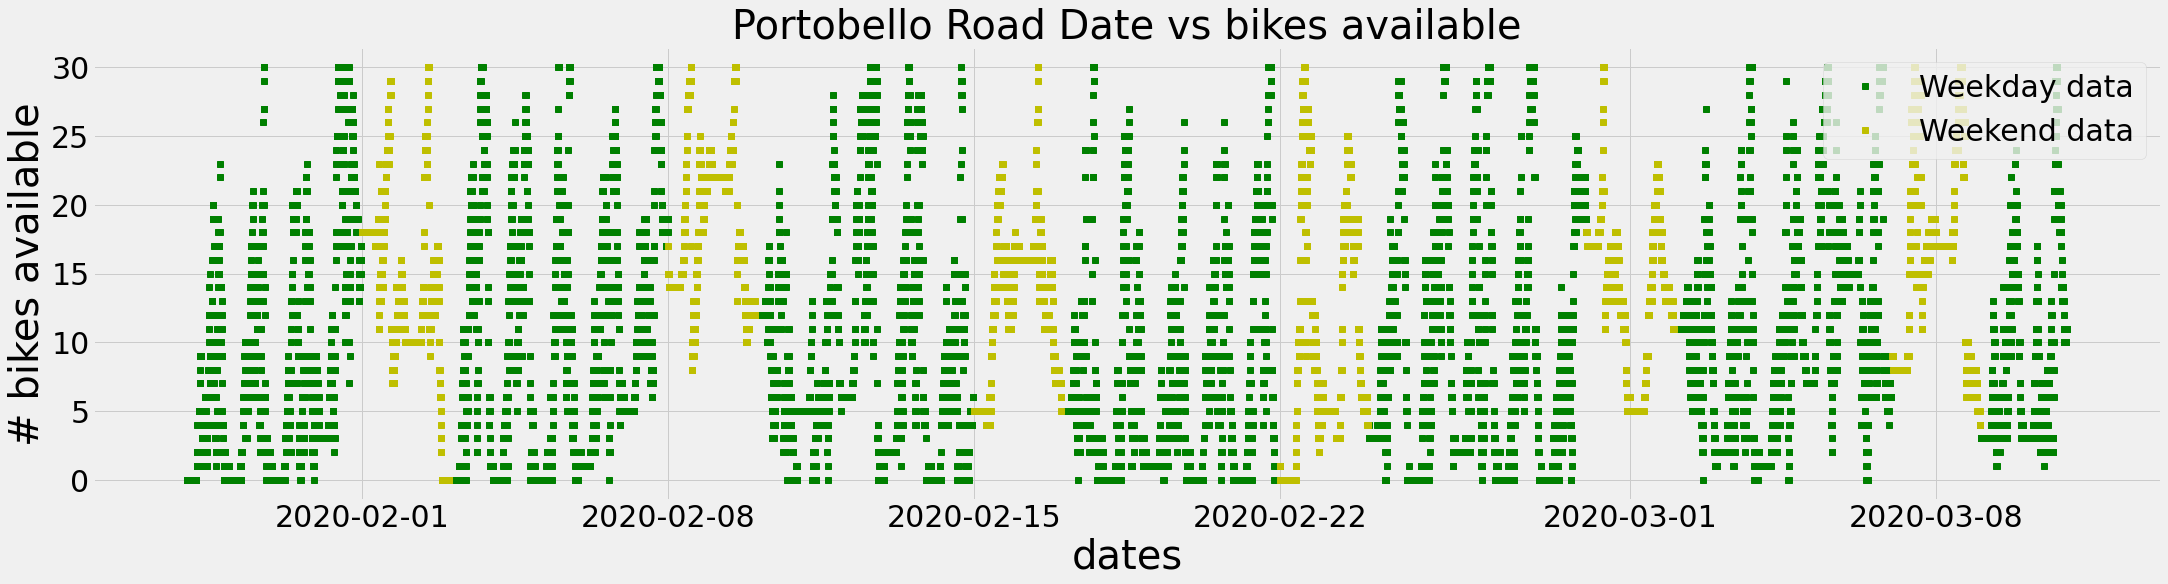

In [32]:
plt.plot(portobelloWeekDay.iloc[:,0],portobelloWeekDay.iloc[:,1],'s',color='green')
plt.plot(portobelloWeekEnd.iloc[:,0],portobelloWeekEnd.iloc[:,1],'s',color='y')
plt.legend(["Weekday data","Weekend data",],loc='upper right',fontsize=30)
plt.rcParams['figure.figsize']=[30,8]
plt.title("Portobello Road Date vs bikes available",size=40)
plt.xlabel('dates',size=40)
plt.ylabel('# bikes available',size=40)
plt.rc('xtick',labelsize=30)
plt.rc('ytick',labelsize=30)

,TIME,AVAILABLE BIKES,dayNum,dataType
0,2020-02-01 00:00:02,24,5,Saturday
1,2020-02-01 00:05:02,24,5,Saturday
2,2020-02-01 00:10:02,24,5,Saturday
3,2020-02-01 00:15:02,24,5,Saturday
4,2020-02-01 00:20:02,24,5,Saturday


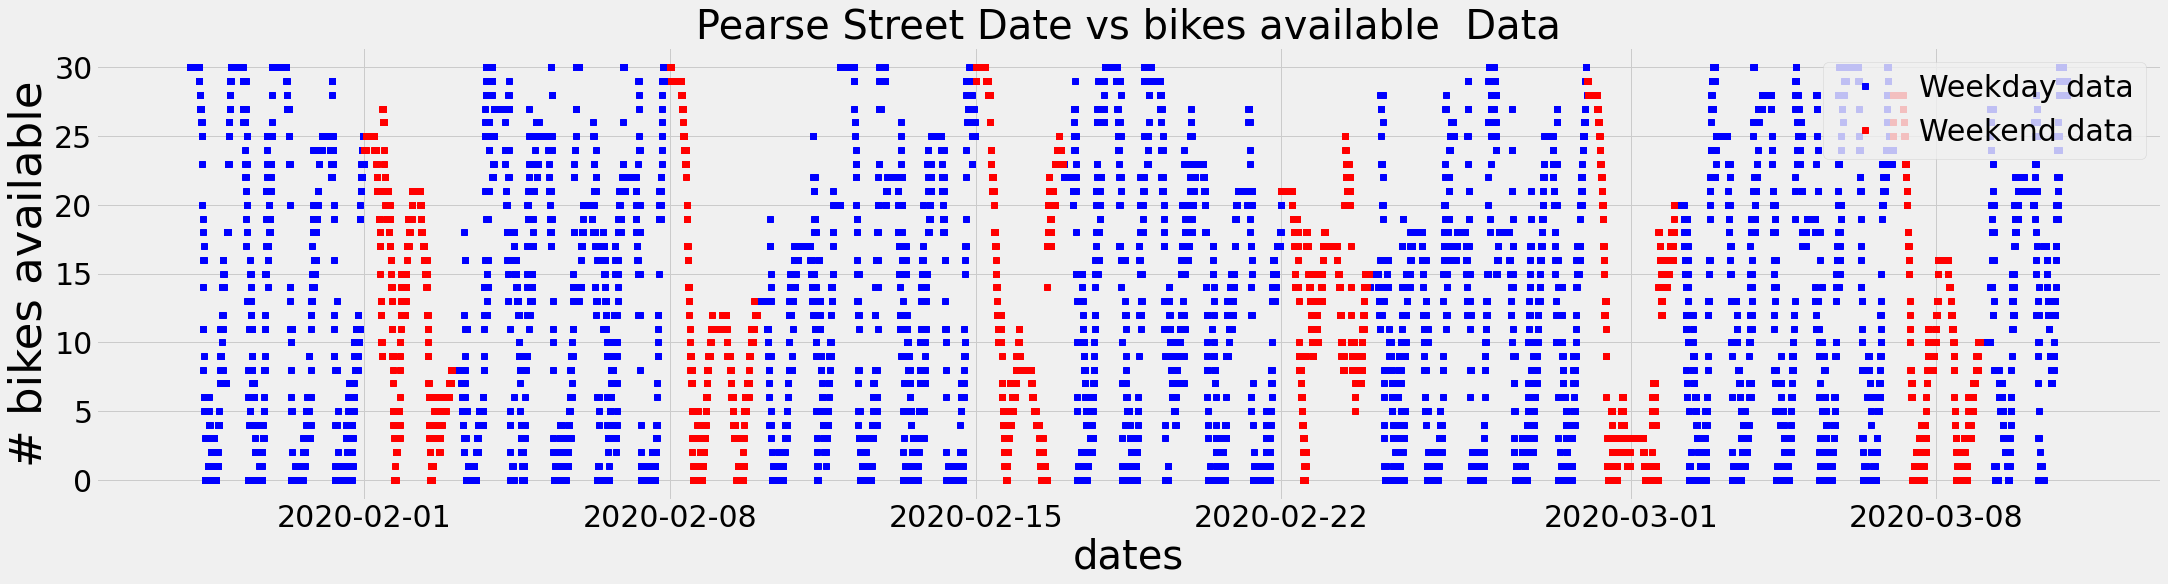

In [33]:
plt.plot(pearseWeekDay.iloc[:,0],pearseWeekDay.iloc[:,1],'s',color='blue')
plt.plot(pearseEnd.iloc[:,0],pearseEnd.iloc[:,1],'s',color='red')
plt.title("Pearse Street Date vs bikes available  Data",size=40)
plt.legend(["Weekday data","Weekend data",],loc='upper right',fontsize=30)
plt.xlabel('dates',size=40)
plt.rcParams['figure.figsize']=[30,8]
plt.ylabel('# bikes available',size=45)
plt.rc('xtick',labelsize=30)
plt.rc('ytick',labelsize=30)
pearseEnd.head()